# Normalize

In [1]:
(ns dry-sunrise
  (:require
    [opencv4.utils :as u]
    [opencv4.colors.rgb :as rgb]
    [opencv4.core :refer :all]))

nil

## Blue Mat with RGB values between 0 and 255

In [3]:
(defn pixel-map!
  "Applies a function to each pixel. Very slow."
  [im fn_]
  (let [buffer (flatten (vec (->bytes im)))
        pixels (partition 3 buffer)]
    (->> pixels
         (map fn_ )
         (flatten)
         (byte-array)
         (.put im 0 0))
    im))

#'dry-sunrise/pixel-map!

In [4]:
(def py-mat (new-mat 1 1 CV_8UC3 (new-scalar 100 200 150)))

(defn my-fn [[b g r] ]
  (let[ sum (+ b g r)] [(* 255 (/ b sum)) (* 255 (/ g sum)) (* 255 (/ r sum))]))

(-> py-mat ->string)
(-> py-mat (pixel-map! my-fn) ->string)
; 56 113 85

[[101 230 179]]

In [5]:
(-> (new-mat 1 1 CV_8UC3 rgb/blueviolet) ->string)

[[226 43 138]]

In [6]:
(def blue-mat (new-mat 3 3 CV_8UC3 rgb/blueviolet))
(u/>>> blue-mat)
(dump blue-mat)

[226 43 138 226 43 138 226 43 138]
[226 43 138 226 43 138 226 43 138]
[226 43 138 226 43 138 226 43 138]


nil

In [7]:
(-> (new-mat  1 1 CV_8UC3 rgb/blueviolet)
    (u/pixel-map! my-fn)
    (->string))

[[72 152 30]]

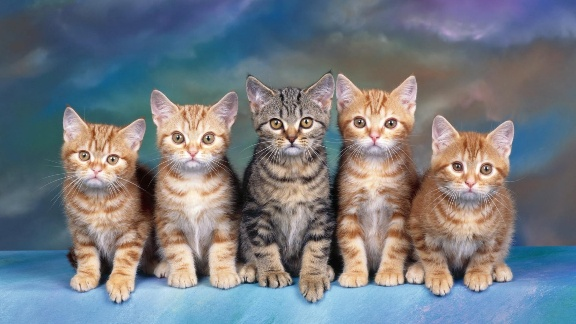

In [9]:
(def cat (-> "resources/kittens/catfamily.jpg" imread (u/resize-by 0.3)))
(u/>>> cat)

In [10]:
(defn my-fn [[b g r] ]
  (let[ sum (+ b g r)] [(* 255 (/ b sum)) (* 255 (/ g sum)) (* 255 (/ r sum))]))

(-> cat
     (pixel-map! my-fn)
     (u/>>>))

ArithmeticException Divide by zero  clojure.lang.Numbers.divide (Numbers.java:163)


class java.lang.ArithmeticException: 